doc :https://github.com/fastai/fastbook/blob/master/02_production.ipynb

ref : https://link.springer.com/article/10.1007/s10278-019-00299-9
https://www.acr.org/Media-Center/ACR-News-Releases/2019/SIIM-and-ACR-Host-Machine-Learning-Challenge-for-Pneumothorax-Detection-and-Localization

In [ ]:
!pip install pylibjpeg-libjpeg

In [ ]:
!pip install pylibjpeg==1.1.1

import pylibjpeg

pylibjpeg.__version__
## 1.1.1

In [1]:
!pip install fastai --upgrade && pip install  kornia pydicom
!pip install nbdev

from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

     |████████████████████████████████| 194kB 20.3MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 225kB 16.0MB/s 
     |████████████████████████████████| 1.9MB 37.6MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pickle
import hashlib

In [4]:
def get_x(x):
  return x[3]

def get_y(x):
  return x[2]

pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
                   get_x=get_x,
                   get_y=get_y,
                   batch_tfms=aug_transforms(size=224))

In [5]:
path = Path()
learn_inf = load_learner(path/"/content/drive/MyDrive/CNNe50_PROJET_PNEUMOTHORAX_FASTAI.pkl")

In [6]:
#test = get_dicom_files('/content/drive/MyDrive/pneumothorax/dicom-images-test')

with open ('/content/drive/MyDrive/test_path', 'rb') as fp:
    test_path = pickle.load(fp)

#with open('test_path', 'wb') as f1:
    #pickle.dump(test, f1)



PREDICTION SUR LES RADIO DE TOULOUSE

In [7]:
ds_toulouse = get_files('/content/drive/MyDrive/pneumothorax/DATASET TOULOUSE PNEUMOTHORAX/PNEUMOTHORAX')
example = pydicom.dcmread(ds_toulouse[0])

In [8]:
!pip install -q tensorflow-io
!pip install SimpleITK
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_io as tfio
import SimpleITK as sitk

     |████████████████████████████████| 25.3MB 141kB/s 
     |████████████████████████████████| 47.4MB 67kB/s 


In [ ]:
acc / len(ds_toulouse)

0.9148936170212766

In [17]:
acc = 0
for j in ds_toulouse:
    image_bytes = tf.io.read_file(str(j))
    image = tfio.image.decode_dicom_image(image_bytes,scale='auto', on_error='lossy', dtype=tf.uint8)
    image_np = np.squeeze(image.numpy())

    img = sitk.GetImageFromArray(image_np)
    sitk.WriteImage(img, "test.dcm")
    res = learn_inf.predict('test.dcm')
    if res[0] == 'No Pneumothorax':
        acc+=1
        plt.rcParams['figure.figsize'] = 10, 10
        plt.imshow(image_np, cmap=plt.cm.bone)
        plt.show()
    
    print(res)

Output hidden; open in https://colab.research.google.com to view.

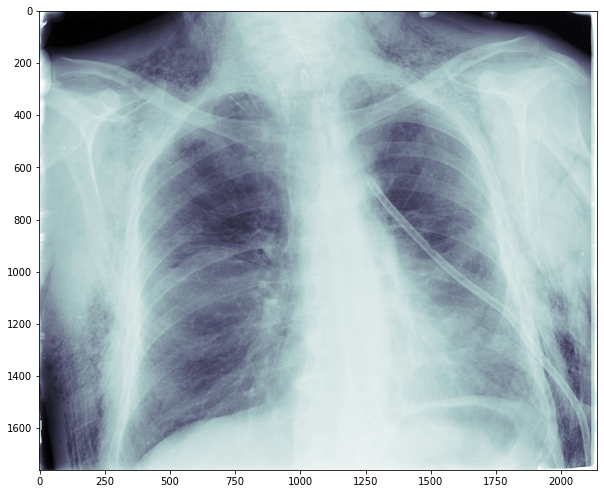

In [ ]:
plt.rcParams['figure.figsize'] = 10, 10
plt.imshow(image_np, cmap=plt.cm.bone)
plt.show()

In [ ]:
learn_inf.predict(ds_toulouse[0])

('No Pneumothorax', tensor(0), tensor([0.9958, 0.0042]))

PREDICTIONS SUR LE DOSSIER TEST USA

In [16]:
acc = 0
for j in test_path:
    res = learn_inf.predict(j)
    if res[0:10]:
        acc+=1
        ds = pydicom.dcmread(j)
        plt.rcParams['figure.figsize'] = 10, 10
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        plt.show()
    
    print(res)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
len(test_path)

1377

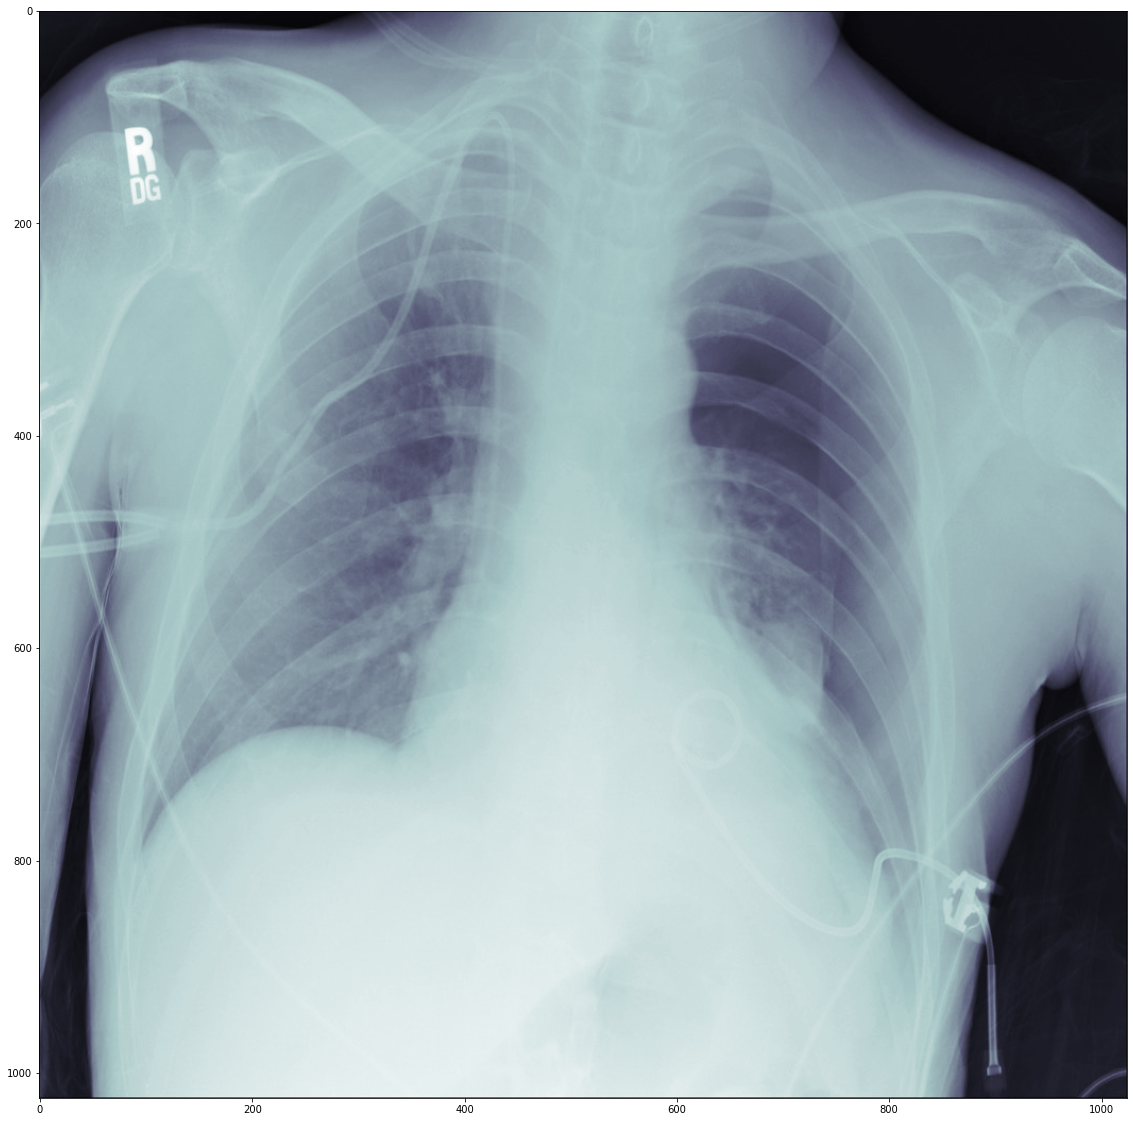

In [14]:
plt.rcParams['figure.figsize'] = 20, 20
nb_of_imges = [600]

for j in nb_of_imges:
    ds = pydicom.dcmread(test_path[j])
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.show()
    


In [15]:
learn_inf.predict(test_path[j])

('Pneumothorax', tensor(1), tensor([0.2187, 0.7813]))

DATASET TOULOUSE


In [ ]:
!pip install pylibjpeg

     |████████████████████████████████| 3.6MB 13.1MB/s 


In [ ]:
dataset_tlse = get_dicom_files('/content/drive/MyDrive/pneumothorax/DATASET TOULOUSE PNEUMOTHORAX/PNEUMOTHORAX')

In [ ]:
print(len(dataset_tlse))

0


In [ ]:
!git clone git://git.code.sf.net/p/gdcm/gdcm

Cloning into 'gdcm'...
remote: Enumerating objects: 85373, done.
remote: Counting objects: 100% (85373/85373), done.
remote: Compressing objects: 100% (19098/19098), done.
remote: Total 85373 (delta 67675), reused 83586 (delta 66059)
Receiving objects: 100% (85373/85373), 24.62 MiB | 11.57 MiB/s, done.
Resolving deltas: 100% (67675/67675), done.


In [ ]:
!pip install gdcm
!pip install pylibjpeg


In [ ]:
!pip install -q tensorflow-io

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_io as tfio

     |████████████████████████████████| 25.3MB 133kB/s 


In [ ]:
image_bytes = tf.io.read_file('/content/drive/MyDrive/pneumothorax/DATASET TOULOUSE PNEUMOTHORAX/PNEUMOTHORAX/EXP00000/EXP0000')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint8)

In [ ]:
image_array = np.squeeze(image.numpy())
learn_inf.predict(image_array)

IndexError: ignored

In [ ]:
ds = pydicom.dcmread('/content/drive/MyDrive/pneumothorax/DATASET TOULOUSE PNEUMOTHORAX/PNEUMOTHORAX/EXP00000/EXP0000')
plt.rcParams['figure.figsize'] = 20, 20
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()


In [ ]:
learn_inf.predict(image_array)

In [ ]:
test = Path('/content/drive/MyDrive/pneumothorax/DATASET TOULOUSE PNEUMOTHORAX/PNEUMOTHORAX/EXP00000/EXP0000')
test.dcmread()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 248
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113711.999999.24758.1610984051.1.1
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113711.1
(0002, 0013) Implementation Version Name         SH: 'V1.0'
(0002, 0016) Source Application Entity Title     AE: 'CONFIDENTIAL'
(0002, 0100) Private Information Creator UID     UI: 1.2.840.113711.1
(0002, 0102) Private Information                 OB: Array of 28 elements
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                     

WIDGET 

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_upload = SimpleNamespace(data = [' '])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: ignored

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: ignored

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run 

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your Thoracic Radio!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

INSTALL GDCM

In [ ]:
!pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg

     |████████████████████████████████| 4.2MB 18.4MB/s 
     |████████████████████████████████| 3.6MB 58.7MB/s 
